# Qcodes example with Teledyne LeCroy 44MXs-B

In [32]:
import qcodes as qc
from qcodes.instrument_drivers.TeledyneLeCroy.TD44MXsB import TD44MXsB
from qcodes.dataset.measurements import Measurement
from qcodes.dataset.data_set import load_by_id
from qcodes.dataset.data_export import get_data_by_id
from qcodes.dataset.plotting import plot_by_id
from qcodes.dataset.database import initialise_database

In [27]:
import logging
import qcodes.logger as logger
from qcodes.logger import start_all_logging
start_all_logging()

Activating auto-logging. Current session state plus future input saved.
Filename       : C:\Users\He5user\.qcodes\logs\command_history.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active


In [2]:
from matplotlib import pyplot as plt
import numpy as np
import struct

In [3]:
osc = TD44MXsB('osc', 'TCPIP0::192.168.1.7::INSTR')

In [4]:
initialise_database()
qc.new_experiment(name='TD44MXsB_test', sample_name='no_sample')

TD44MXsB_test#no_sample#10@C:\Users\He5user/experiments.db
----------------------------------------------------------

In [ ]:
osc.C3.waveform.prepare_waveform()

meas = Measurement()
meas.register_parameter(osc.C3.waveform, paramtype='array')

with meas.run() as datasaver:
    waveform = osc.C3.waveform.get()
    datasaver.add_result((osc.C3.waveform, waveform))
    run_id = datasaver.run_id

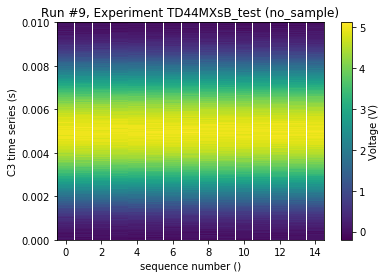

In [78]:
ds = load_by_id(run_id)

title = f"Run #{run_id}, Experiment {ds.exp_name} ({ds.sample_name})"
param_labels = [f'{param.label} ({param.unit})' for param in ds.get_parameters()]
param_names = [param.name for param in ds.get_parameters()]
X, Y, Z = ds.get_data(*param_names)[0]

fig, ax = plt.subplots()
mesh = ax.pcolormesh(X-0.5, Y, Z, rasterized=True)
#ax.axis([X.min(), X.max(), Y.min(), Y.max()])
cax = plt.colorbar(mesh, ax=ax);

ax.set_title(title)
ax.set_xlabel(param_labels[0])
ax.set_ylabel(param_labels[1])
cax.set_label(param_labels[2])